In [1]:
import os

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import proplot as plot

import seaborn as sns

/home/ronnie-rattan/miniforge3/envs/texas-env/lib/python3.10/site-packages/proplot/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


In [2]:
import matplotlib.font_manager as fm
# List all fonts that support Thai (searching for common TLWG font names)
[f.name for f in fm.fontManager.ttflist if 'Loma' in f.name or 'Garuda' in f.name]


['Garuda',
 'Loma',
 'Loma',
 'Garuda',
 'Loma',
 'Loma',
 'Garuda',
 'Garuda',
 'Garuda',
 'Loma',
 'Garuda',
 'Garuda',
 'Loma',
 'Garuda',
 'Loma',
 'Loma']

In [11]:
user_name = os.getlogin()
local_onedrive_path = f"/home/{user_name}/OneDrive/"
local_github_path = f"/home/{user_name}/Documents/GitHub/th-election69-visualization"
local_github_path

'/home/ronnie-rattan/Documents/GitHub/th-election69-visualization'

In [14]:
subfolder = '/data/election69/'
fname = 'ElectionData-Analysis-Public-Transfer-unofficial94percent.xlsx'

df_const = pd.read_excel(os.path.join(local_github_path+subfolder,fname))
df_const = df_const.rename(columns={
    'จังหวัด': 'province',
    'พรรคที่สังกัด': 'party',
    'เขตเลือกตั้งที่': 'constituency_number',
    'ลำดับคะแนน': 'rank',
    'คะแนนเสียง': 'votes',
    'ผู้มาใช้สิทธิ์': 'voters',
    'บัตรดี': 'valid_ballots',
    'บัตรเสีย': 'invalid_ballots',
    'บัตรไม่เลือกผู้ใด': 'blank_ballots'
})

df_party_list = pd.read_excel(os.path.join(local_github_path+subfolder,fname), sheet_name='party list')
df_party_list = df_party_list.rename(columns={
    'จังหวัด': 'province',
    'เขตเลือกตั้งที่': 'constituency_number',
    'ลำดับคะแนน': 'rank',
    'พรรคการเมือง': 'party',
    'คะแนนเสียง': 'votes',
    'ผู้มาใช้สิทธิ์': 'voters',
    'บัตรดี': 'valid_ballots',
    'บัตรเสีย': 'invalid_ballots',
    'บัตรไม่เลือกผู้ใด': 'blank_ballots'
})

In [15]:
NE_region = ['อำนาจเจริญ', 'บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์', 'ขอนแก่น', 'เลย', 
             'มหาสารคาม', 'มุกดาหาร', 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 
             'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร']
N_region = ['เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์']
W_region = ['ตาก', 'กาญจนบุรี', 'ราชบุรี', 'เพชรบุรี', 'ประจวบคีรีขันธ์']
E_region = ['ฉะเชิงเทรา', 'จันทบุรี', 'ชลบุรี', 'ปราจีนบุรี', 'ระยอง', 'สระแก้ว', 'ตราด']
Central_region = ['อุทัยธานี','อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 
                  'ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'นครนายก', 'นครสวรรค์',
                  'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี',
                  'สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์'
                  ]
Bangkok = ['กรุงเทพมหานคร']
S_region = ['ชุมพร', 'นครศรีธรรมราช', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา', 'กระบี่', 'พังงา', 'ภูเก็ต', 'ระนอง', 'สตูล', 'ตรัง']

region_dict = {**{province: '02 Northeast' for province in NE_region},
               **{province: '01 North' for province in N_region},
               **{province: '06 West' for province in W_region},
               **{province: '03 East' for province in E_region},
               **{province: '04 Central' for province in Central_region},
               **{province: '05 Bangkok' for province in Bangkok},
               **{province: '07 South' for province in S_region}}

df_const['region'] = df_const['province'].map(region_dict)
df_party_list['region'] = df_party_list['province'].map(region_dict)

In [16]:
df_const.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_const.loc[idx+1, 'votes']).values

array([19641, 19674, 14920, 14018, 15002, 18263, 21776, 21113, 12395,
       11394, 14919, 16267, 17889, 23498, 14631, 13459, 23065, 20601,
       14124, 15271, 19113, 16377, 25374, 19685, 16643, 16632, 14391,
       20596, 15641, 25765, 10169, 15968, 13620, 14350, 12436, 14177,
       23090, 25590, 37533, 15683, 25773, 18019, 17811, 13884, 24218,
       20906, 13867, 28101, 31308, 27994, 25872, 22129, 25333, 26913,
       21645, 30322, 19305, 20861, 26379, 19215, 29951, 13467, 28065,
       25889, 25697, 33404, 30804, 20386, 34283, 39920, 27060, 34946,
       22859, 23056, 33008, 30427, 31463, 21976, 22072, 24658, 15985,
        3678, 14055, 14531, 12666, 21560, 16078, 22123, 32047, 22142,
       26755, 32523, 34765, 26574, 27805, 22492, 23595, 17990, 17467,
       27289, 27168, 25116, 27977, 21777, 23283, 23648, 35035, 19699,
       16385, 33223, 33139, 21898, 34078, 35380, 22446, 29409, 18142,
       19170, 11397, 23360, 35460, 13223, 15296, 22693, 26528, 25057,
       28972, 28132,

In [17]:
df_const['sum_ballots'] = df_const['valid_ballots'] + df_const['invalid_ballots'] + df_const['blank_ballots']
df_const['const_winning_votes_diff'] = df_const.groupby(['province', 'constituency_number'])['votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])
const_voters = pd.pivot_table(df_const, index=['province','constituency_number'], values='voters', aggfunc='mean').reset_index()
const_voters['const_winning_party'] = df_const.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_const.loc[idx, 'party']).values
const_voters['const_winning_score'] = df_const.groupby(['province','constituency_number'])['votes'].max().values
const_voters['const_winning_score_diff'] = df_const.groupby(['province','constituency_number'])['votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])
const_voters['const_invalid_ballots'] = df_const.groupby(['province','constituency_number'])['invalid_ballots'].mean().values
const_voters['const_runnerUp_party'] = df_const.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_const.loc[idx+1, 'party']).values
const_voters['const_runnerUp_score'] = df_const.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_const.loc[idx+1, 'votes']).values
const_voters = const_voters.rename(columns={'voters':'const_voters'})
const_voters

,province,constituency_number,const_voters,const_winning_party,const_winning_score,const_winning_score_diff,const_invalid_ballots,const_runnerUp_party,const_runnerUp_score
0,กระบี่,1,92613.0,ภูมิใจไทย,47972,28331,2599.0,ประชาชน,19641
1,กระบี่,2,78537.0,ภูมิใจไทย,39705,28331,2435.0,ประชาธิปัตย์,19674
2,กระบี่,3,89805.0,ภูมิใจไทย,45246,28331,2749.0,ประชาธิปัตย์,14920
3,กรุงเทพมหานคร,1,78449.0,ประชาชน,32564,28331,1083.0,ประชาธิปัตย์,14018
4,กรุงเทพมหานคร,2,84672.0,ประชาชน,37055,28331,1319.0,ภูมิใจไทย,15002
...,...,...,...,...,...,...,...,...,...
395,แพร่,1,85567.0,ภูมิใจไทย,34337,11943,2335.0,ประชาชน,21705
396,แพร่,2,76409.0,ภูมิใจไทย,50300,11943,2920.0,เพื่อไทย,11658
397,แพร่,3,82810.0,ประชาชน,23574,11943,5976.0,เพื่อไทย,21142
398,แม่ฮ่องสอน,1,64490.0,กล้าธรรม,33724,25437,3690.0,ประชาชน,17878


In [18]:
df_party_list['sum_ballots'] = df_party_list['valid_ballots'] + df_party_list['invalid_ballots'] + df_party_list['blank_ballots']
df_party_list['party_winning_votes_diff'] = df_party_list.groupby(['province', 'constituency_number'])['votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])
party_voters = pd.pivot_table(df_party_list, index=['province','constituency_number'], values='voters', aggfunc='mean').reset_index()
party_voters['party_winning_party'] = df_party_list.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_party_list.loc[idx, 'party']).values
party_voters['party_winning_score'] = df_party_list.groupby(['province','constituency_number'])['votes'].max().values
party_voters['party_winning_score_diff'] = df_party_list.groupby(['province','constituency_number'])['votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])
party_voters['party_invalid_ballots'] = df_party_list.groupby(['province','constituency_number'])['invalid_ballots'].mean().values
party_voters['party_runnerUp_party'] = df_party_list.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_party_list.loc[idx+1, 'party']).values
party_voters['party_runnerUp_score'] = df_party_list.groupby(['province','constituency_number'])['votes'].idxmax().apply(lambda idx: df_party_list.loc[idx+1, 'votes']).values
party_voters = party_voters.rename(columns={'voters':'party_voters'})
party_voters

,province,constituency_number,party_voters,party_winning_party,party_winning_score,party_winning_score_diff,party_invalid_ballots,party_runnerUp_party,party_runnerUp_score
0,กระบี่,1,92607.0,ประชาธิปัตย์,32568,11140,3254.0,ประชาชน,21428
1,กระบี่,2,78612.0,ประชาธิปัตย์,44106,11140,2804.0,ประชาชน,10752
2,กระบี่,3,85728.0,ประชาธิปัตย์,43386,11140,3064.0,ภูมิใจไทย,12020
3,กรุงเทพมหานคร,1,78155.0,ประชาชน,32377,11140,1590.0,ภูมิใจไทย,15663
4,กรุงเทพมหานคร,2,84550.0,ประชาชน,37773,11140,1432.0,ภูมิใจไทย,16954
...,...,...,...,...,...,...,...,...,...
395,แพร่,1,86403.0,ประชาชน,29426,5657,3017.0,เพื่อไทย,21251
396,แพร่,2,76230.0,ภูมิใจไทย,26891,5657,3894.0,เพื่อไทย,16517
397,แพร่,3,71774.0,เพื่อไทย,20473,5657,4298.0,ประชาชน,18547
398,แม่ฮ่องสอน,1,64530.0,ประชาชน,25406,5657,2860.0,เพื่อไทย,5432


In [19]:
### join the two dataframes
voters = pd.merge(const_voters, party_voters, on=['province', 'constituency_number'], how='outer')
voters['voters_diff_const_PL'] = voters['const_voters'] - voters['party_voters']

voters

### filter rows where const_winning_score_diff  < (invalid ballots + voters_diff_const_PL)
idx_close_const = ((voters['const_winning_score_diff'] < (voters['const_invalid_ballots'] + voters['voters_diff_const_PL']))
                    & (voters['voters_diff_const_PL'] > 0))  # only consider cases where the const ballots > party list ballots)
close_constituencies = voters[idx_close_const]
display(close_constituencies)

idx_close_PL = ((voters['party_winning_score_diff'] < (voters['party_invalid_ballots'] + (-voters['voters_diff_const_PL'])))
                & (voters['voters_diff_const_PL'] < 0))  # only consider cases where the party list ballots > const ballots
close_party_list = voters[idx_close_PL]
display(close_party_list)

,province,constituency_number,const_voters,const_winning_party,const_winning_score,const_winning_score_diff,const_invalid_ballots,const_runnerUp_party,const_runnerUp_score,party_voters,party_winning_party,party_winning_score,party_winning_score_diff,party_invalid_ballots,party_runnerUp_party,party_runnerUp_score,voters_diff_const_PL
209,พิษณุโลก,4,89290.0,ภูมิใจไทย,40713,5663,3141.0,เพื่อไทย,27898,84628.0,ภูมิใจไทย,21570,20929,5236.0,ประชาชน,20526,4662.0
262,ศรีสะเกษ,6,70972.0,ภูมิใจไทย,26211,12985,2850.0,เพื่อไทย,25995,60564.0,เพื่อไทย,17564,26917,3930.0,ภูมิใจไทย,16342,10408.0
397,แพร่,3,82810.0,ประชาชน,23574,11943,5976.0,เพื่อไทย,21142,71774.0,เพื่อไทย,20473,5657,4298.0,ประชาชน,18547,11036.0


,province,constituency_number,const_voters,const_winning_party,const_winning_score,const_winning_score_diff,const_invalid_ballots,const_runnerUp_party,const_runnerUp_score,party_voters,party_winning_party,party_winning_score,party_winning_score_diff,party_invalid_ballots,party_runnerUp_party,party_runnerUp_score,voters_diff_const_PL
382,เพชรบุรี,1,91664.0,ภูมิใจไทย,58584,11246,3637.0,ประชาชน,17417,91842.0,ภูมิใจไทย,27432,4321,4527.0,ประชาชน,23294,-178.0
389,เพชรบูรณ์,5,76316.0,ภูมิใจไทย,42489,11943,4831.0,ประชาชน,15743,76947.0,ภูมิใจไทย,20735,4321,4569.0,ประชาชน,18921,-631.0
390,เพชรบูรณ์,6,86864.0,ภูมิใจไทย,58578,11943,3684.0,ประชาชน,14252,87195.0,ภูมิใจไทย,26886,5657,5904.0,ประชาชน,20638,-331.0


In [20]:
party_color_dict = {
    'ภูมิใจไทย': '#312682',
    'ประชาชน': '#FF6413',
    'เพื่อไทย': '#E30613',
    'กล้าธรรม': '#4EC86F',
    'ประชาธิปัตย์': '#15A5F5',
    'ประชาชาติ': '#BA810D',
    'ไทยสร้างไทย': '#6841D0',
    'พลังประชารัฐ': '#006536',
    'ไทรวมพลัง': '#5266AD',
    'โอกาสใหม่': '#c61a12'
}

party_EN_name_dict = {
    'ภูมิใจไทย': 'Bhumjaithai',
    'ประชาชน': "People's Party",
    'เพื่อไทย': 'Pheu Thai',
    'กล้าธรรม': 'Kla Tham',
    'ประชาธิปัตย์': 'Democrat',
    'ประชาชาติ': 'Prachachat',
    'ไทยสร้างไทย': 'Thai Sang Thai',
    'พลังประชารัฐ': 'Palang Pracharath',
    'ไทรวมพลัง': 'Thai Ruam Phalang',
    'โอกาสใหม่': 'New Opportunity'
}

In [21]:
voters['const_winning_party'].map(party_color_dict)

0      #312682
1      #312682
2      #312682
3      #FF6413
4      #FF6413
        ...   
395    #312682
396    #312682
397    #FF6413
398    #4EC86F
399    #312682
Name: const_winning_party, Length: 400, dtype: object

In [22]:
plot_data = voters[voters['voters_diff_const_PL']>0]
pd.pivot_table(plot_data, values='voters_diff_const_PL', index='const_winning_party', aggfunc=['mean','median'])

,mean,median
,voters_diff_const_PL,voters_diff_const_PL
const_winning_party,,
กล้าธรรม,889.321429,291.5
ประชาชน,928.069767,246.0
ประชาชาติ,1829.500000,1829.5
ประชาธิปัตย์,241.666667,260.0
พลังประชารัฐ,414.000000,414.0
ภูมิใจไทย,1221.875000,300.0
เพื่อไทย,301.961538,139.5
ไทรวมพลัง,421.500000,421.5


In [23]:
voters['region'] = voters['province'].map(region_dict)
voters

,province,constituency_number,const_voters,const_winning_party,const_winning_score,const_winning_score_diff,const_invalid_ballots,const_runnerUp_party,const_runnerUp_score,party_voters,party_winning_party,party_winning_score,party_winning_score_diff,party_invalid_ballots,party_runnerUp_party,party_runnerUp_score,voters_diff_const_PL,region
0,กระบี่,1,92613.0,ภูมิใจไทย,47972,28331,2599.0,ประชาชน,19641,92607.0,ประชาธิปัตย์,32568,11140,3254.0,ประชาชน,21428,6.0,07 South
1,กระบี่,2,78537.0,ภูมิใจไทย,39705,28331,2435.0,ประชาธิปัตย์,19674,78612.0,ประชาธิปัตย์,44106,11140,2804.0,ประชาชน,10752,-75.0,07 South
2,กระบี่,3,89805.0,ภูมิใจไทย,45246,28331,2749.0,ประชาธิปัตย์,14920,85728.0,ประชาธิปัตย์,43386,11140,3064.0,ภูมิใจไทย,12020,4077.0,07 South
3,กรุงเทพมหานคร,1,78449.0,ประชาชน,32564,28331,1083.0,ประชาธิปัตย์,14018,78155.0,ประชาชน,32377,11140,1590.0,ภูมิใจไทย,15663,294.0,05 Bangkok
4,กรุงเทพมหานคร,2,84672.0,ประชาชน,37055,28331,1319.0,ภูมิใจไทย,15002,84550.0,ประชาชน,37773,11140,1432.0,ภูมิใจไทย,16954,122.0,05 Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,แพร่,1,85567.0,ภูมิใจไทย,34337,11943,2335.0,ประชาชน,21705,86403.0,ประชาชน,29426,5657,3017.0,เพื่อไทย,21251,-836.0,01 North
396,แพร่,2,76409.0,ภูมิใจไทย,50300,11943,2920.0,เพื่อไทย,11658,76230.0,ภูมิใจไทย,26891,5657,3894.0,เพื่อไทย,16517,179.0,01 North
397,แพร่,3,82810.0,ประชาชน,23574,11943,5976.0,เพื่อไทย,21142,71774.0,เพื่อไทย,20473,5657,4298.0,ประชาชน,18547,11036.0,01 North
398,แม่ฮ่องสอน,1,64490.0,กล้าธรรม,33724,25437,3690.0,ประชาชน,17878,64530.0,ประชาชน,25406,5657,2860.0,เพื่อไทย,5432,-40.0,01 North


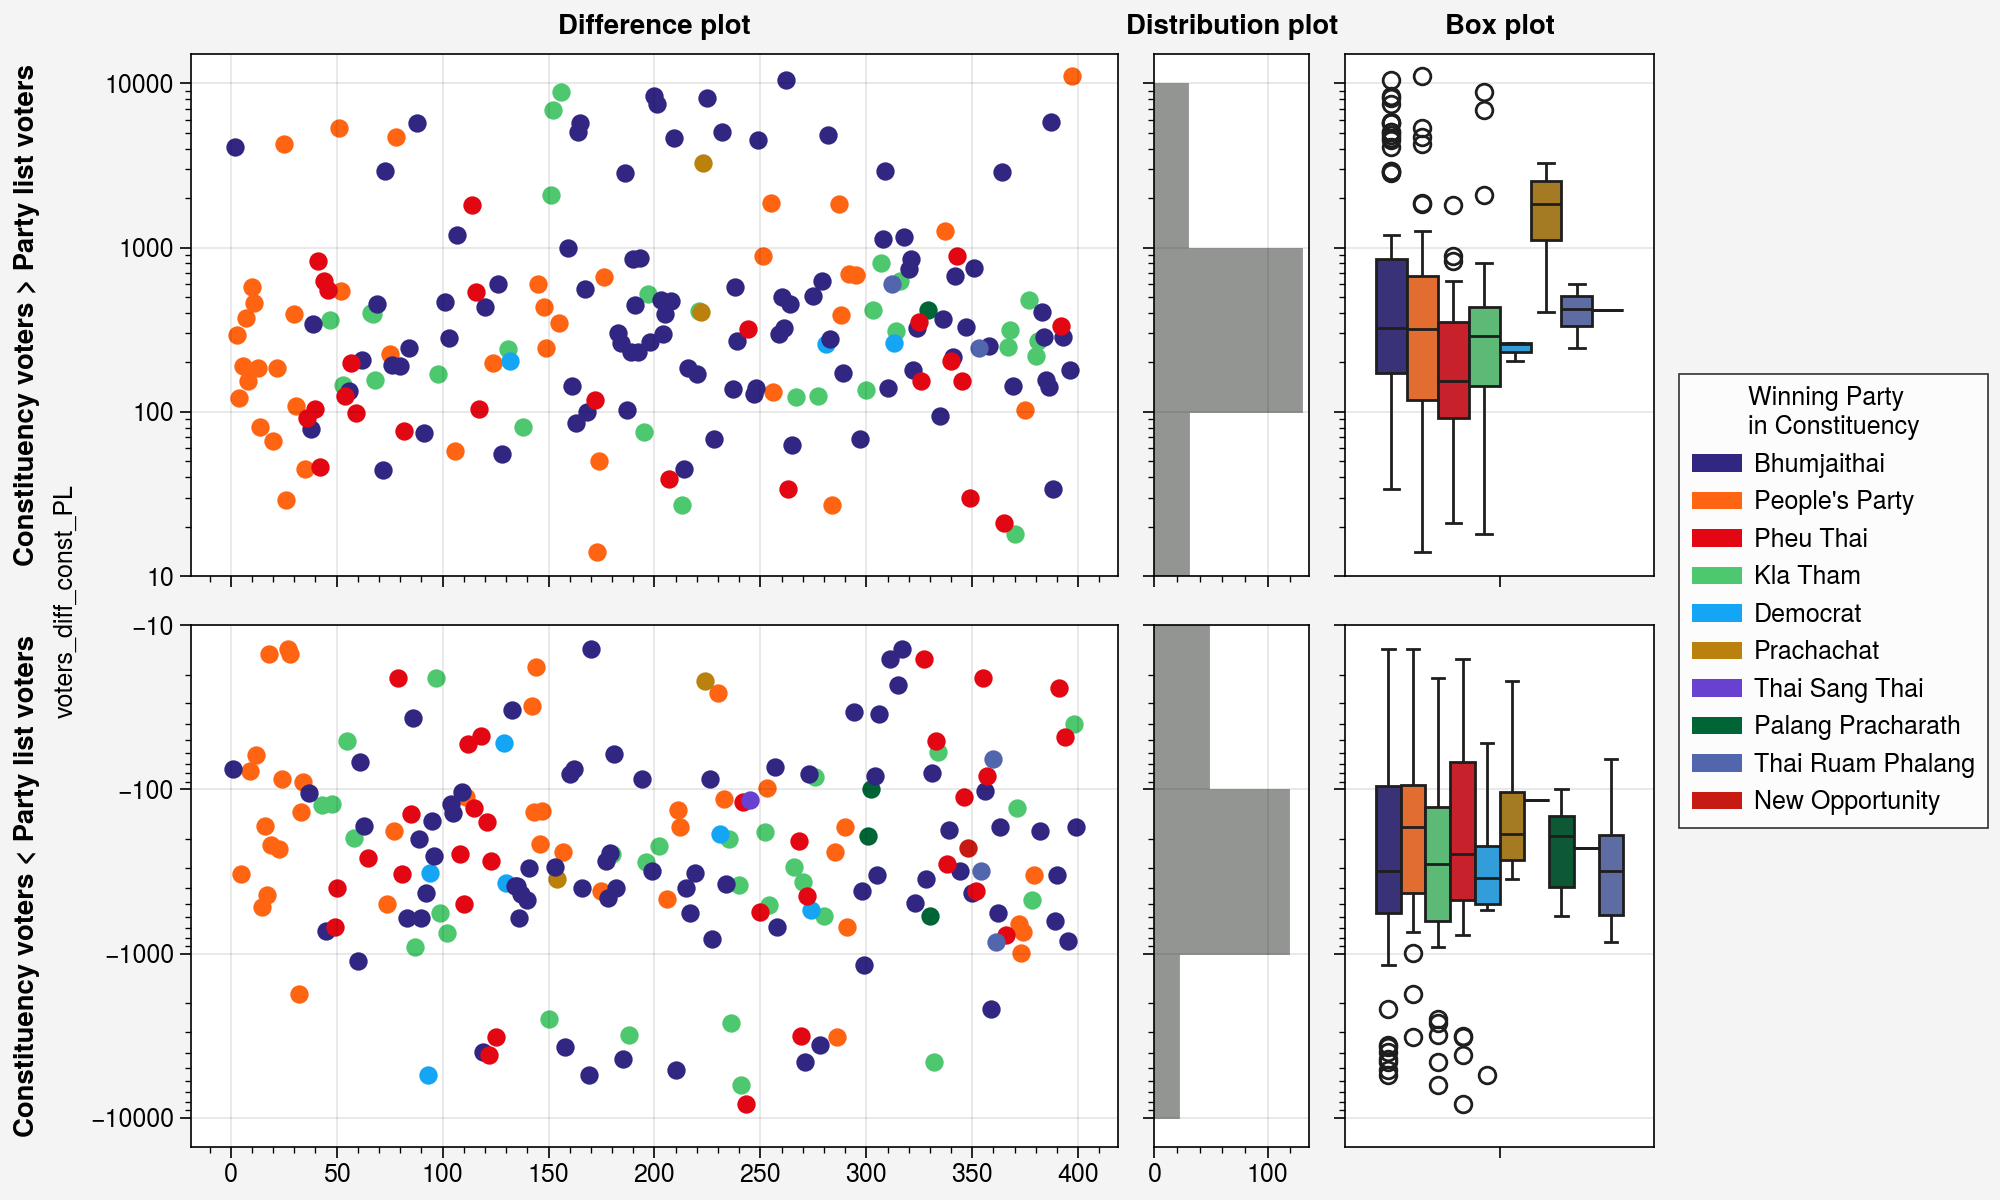

In [24]:
fig, axs = plot.subplots(figsize=(10,6),ncols=3, nrows=2, 
                         wratios=[3,0.5,1]
                         )

meanprops = {"marker": "o",
             "markerfacecolor": "white",
             "markeredgecolor": "black",
             "markersize": "8"}

plot_data = voters[voters['voters_diff_const_PL']>10]
ax = axs[0,0]
grouped = plot_data.groupby('const_winning_party')
for party, group in grouped:
    ax.scatter(group.index, group['voters_diff_const_PL'], label=party, color=party_color_dict.get(party, 'gray'))


### plot the distribution of voters_diff_const_PL
ax = axs[0,1]
ax.hist(plot_data['voters_diff_const_PL'], 
        orientation='horizontal',
        bins=[-10000, -1000, -100, -10, 0, 10, 100, 1000, 10000],
        c='gray',
        )

ax = axs[0,2]
sns.boxplot(
    y=plot_data['voters_diff_const_PL'], ax=ax,
    hue=plot_data['const_winning_party'],
    palette=party_color_dict,
    dodge=True,
    showmeans=False,
    meanprops=meanprops,
    legend=False)

axs[0,:].format(
    yscale='log',
    ylim=(10, 15000)
)
######################################################


plot_data = voters[voters['voters_diff_const_PL']<-10]
ax = axs[1,0]
grouped = plot_data.groupby('const_winning_party')
for party, group in grouped:
    ax.scatter(group.index, group['voters_diff_const_PL'], label=party, color=party_color_dict.get(party, 'gray'))

### plot the distribution of voters_diff_const_PL
ax = axs[1,1]
ax.hist(plot_data['voters_diff_const_PL'], 
        orientation='horizontal',
        bins=[-10000, -1000, -100, -10, 0, 10, 100, 1000, 10000],
        c='gray',
        )

ax = axs[1,2]
sns.boxplot(
    y=plot_data['voters_diff_const_PL'], ax=ax,
    hue=plot_data['const_winning_party'],
    palette=party_color_dict,
    dodge=True,
    showmeans=False,
    meanprops=meanprops,
    legend=False)

axs[1,:].format(
    yscale='symlog',
    ylim=(-15000,-10)
)

axs.format(
    rowlabels=['Constituency voters > Party list voters', 'Constituency voters < Party list voters'],
    collabels=['Difference plot', 'Distribution plot', 'Box plot']
)

### add party labels
# Build legend from ALL parties in party_color_dict (or filter to only those in data)
parties_in_data = voters['const_winning_party'].unique()

legend_handles = [
    mpatches.Patch(facecolor=party_color_dict[party], label=party_EN_name_dict.get(party, party))
    for party in parties_in_data
    if party in party_color_dict
]

fig.legend(
    handles=legend_handles,
    loc='right',
    title='Winning Party\nin Constituency',
    ncol=1,
    frameon=True,
)


In [25]:
plot_data.groupby('const_winning_party').describe()['voters_diff_const_PL'].sort_values('mean', ascending=False).index.values

array(['ไทยสร้างไทย', 'ประชาชาติ', 'โอกาสใหม่', 'พลังประชารัฐ', 'ประชาชน',
       'ไทรวมพลัง', 'ภูมิใจไทย', 'เพื่อไทย', 'กล้าธรรม', 'ประชาธิปัตย์'],
      dtype=object)

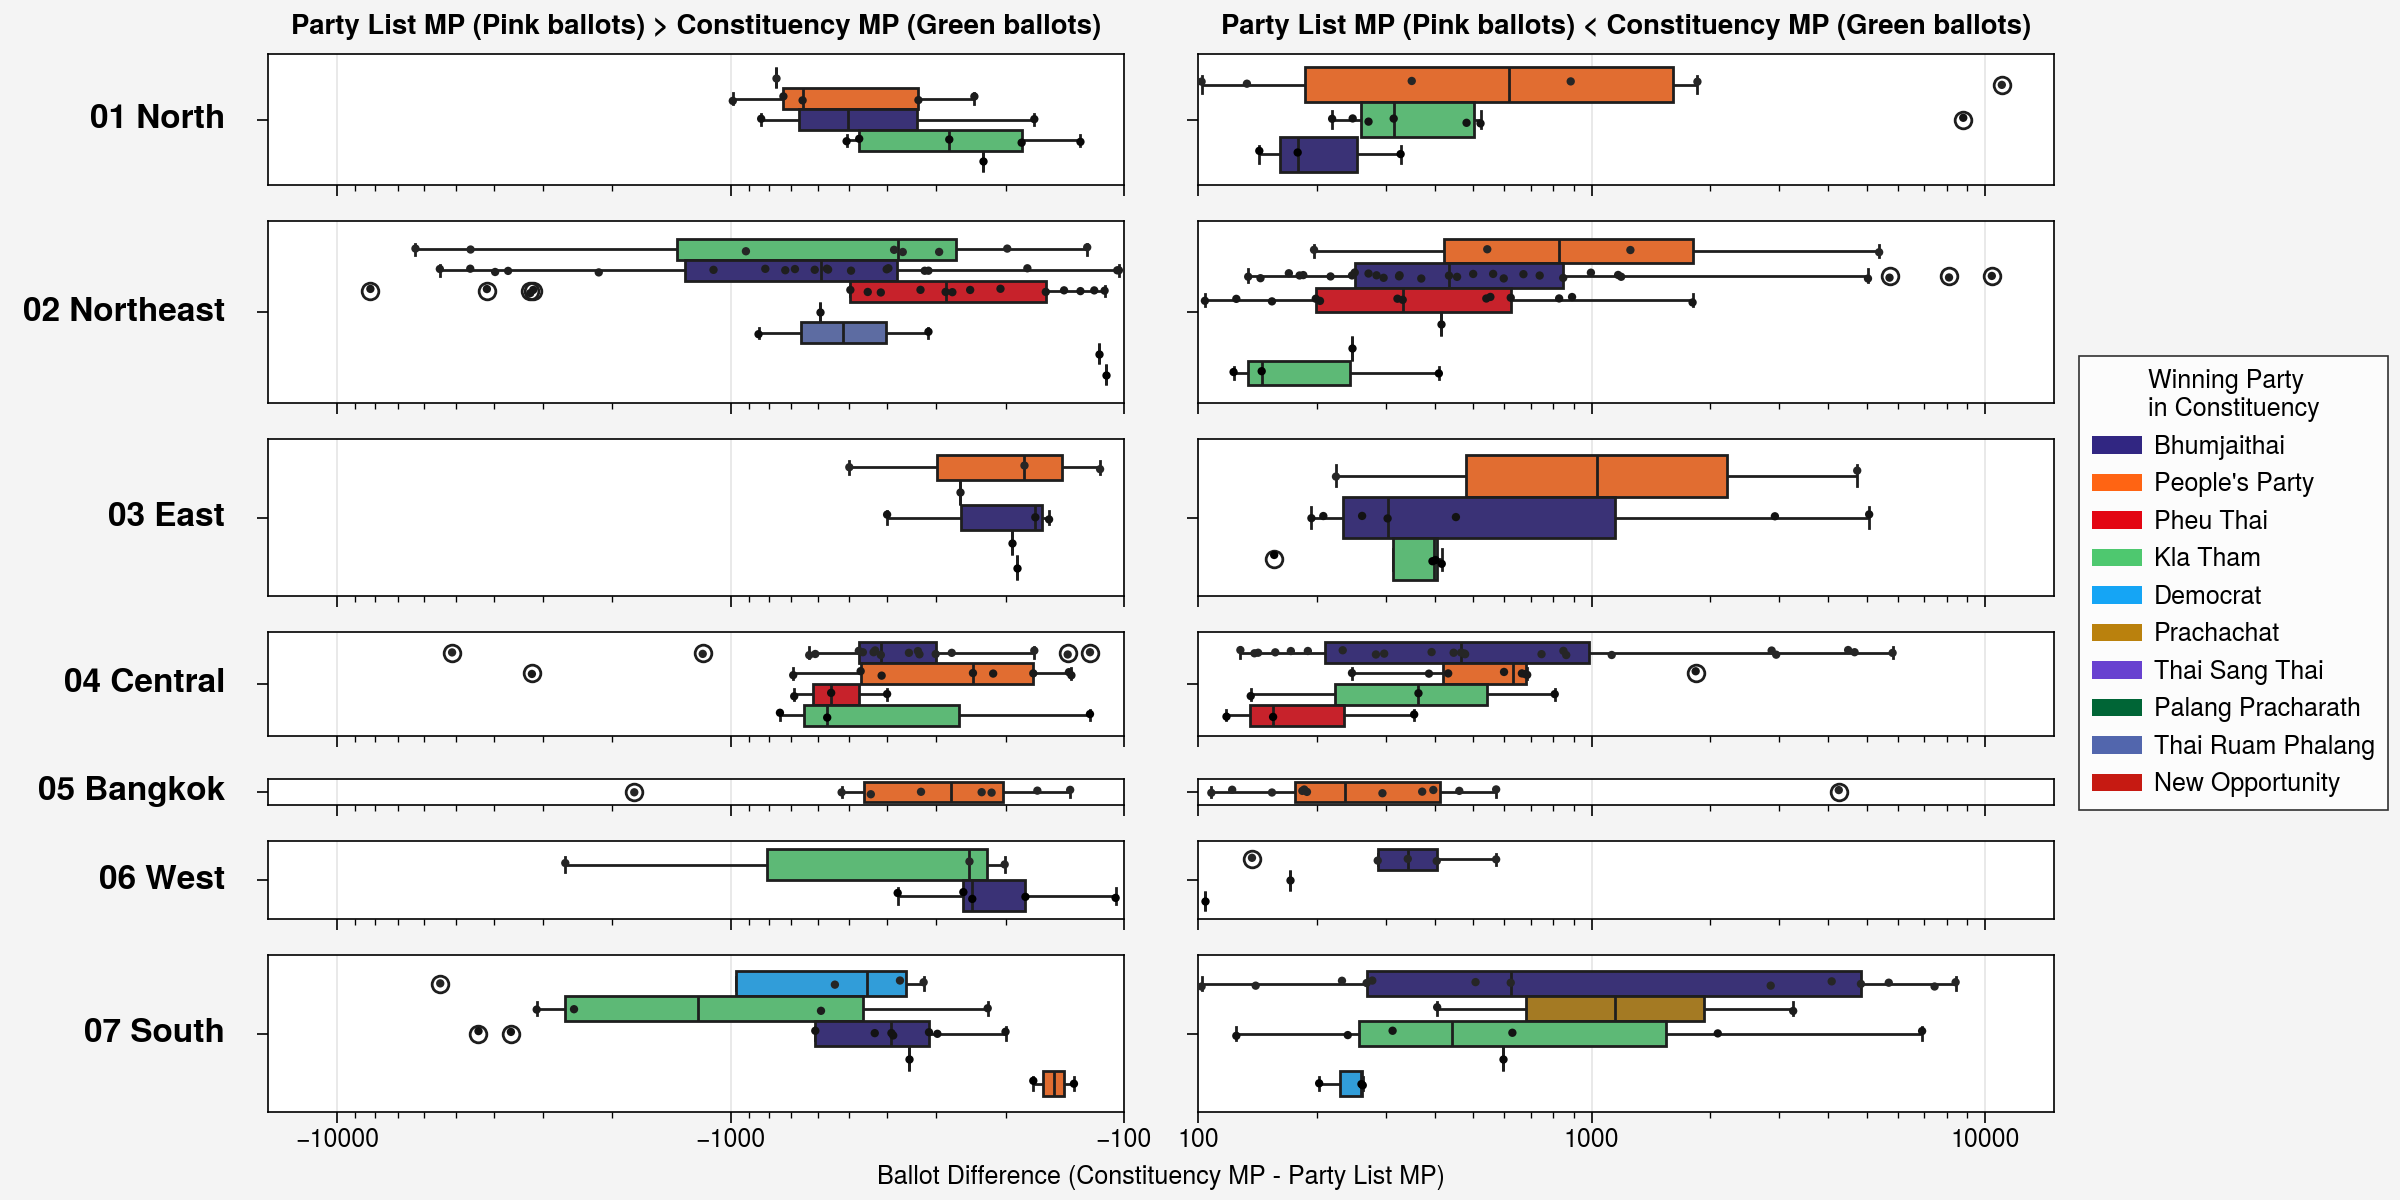

In [26]:

colorby_param = 'const_winning_party'
voters_regions = voters['region'].unique()
hratios = voters.groupby('region')[colorby_param].describe()['unique'].values
fig, axs = plot.subplots(figsize=(12,6),
                         nrows=len(voters_regions), 
                         hratios=hratios,
                         ncols=2,
                         )

meanprops = {"marker": ">",
             "markerfacecolor": "white",
             "markeredgecolor": "black",
             "markersize": "8"}

grouped = voters.groupby('region')
for i, (region, group) in enumerate(grouped):

    # ── Right subplot (PL > Constituency, positive diff) ──────────────────
    plot_data = group[group['voters_diff_const_PL'] > 100]
    sort_order_right = (
        plot_data.groupby(colorby_param)['voters_diff_const_PL']
        .mean()
        .sort_values(ascending=False)
        .index.values
    )

    ax = axs[i, 1]
    sns.boxplot(
        x=plot_data['voters_diff_const_PL'], ax=ax,
        hue=plot_data[colorby_param],
        hue_order=sort_order_right,          # ← was missing entirely
        palette=party_color_dict,
        dodge=True, legend=False,
    )
    sns.stripplot(
        x=plot_data['voters_diff_const_PL'], ax=ax,
        hue=plot_data[colorby_param],
        hue_order=sort_order_right,          # ← was missing entirely
        palette='dark:black',
        dodge=True, legend=False, size=3,
    )
    
    ax.format(
        xlim=(100, 15000),
        xscale='symlog',
        xlabel='',
    )

    # ── Left subplot (PL < Constituency, negative diff) ───────────────────
    plot_data = group[group['voters_diff_const_PL'] < -100]
    sort_order_left = (
        plot_data.groupby(colorby_param)['voters_diff_const_PL']
        .mean()
        .sort_values(ascending=True)
        .index.values
    )

    ax = axs[i, 0]
    sns.boxplot(
        x=plot_data['voters_diff_const_PL'], ax=ax,
        hue=plot_data[colorby_param],
        hue_order=sort_order_left,           # ← was `order=`, now `hue_order=`
        palette=party_color_dict,
        dodge=True, legend=False,
    )
    sns.stripplot(
        x=plot_data['voters_diff_const_PL'], ax=ax,
        hue=plot_data[colorby_param],
        hue_order=sort_order_left,           # ← was `order=`, now `hue_order=`
        palette='dark:black',
        dodge=True, legend=False, size=3,
    )

    ax.text(
        -0.05, 0.5, region, transform=ax.transAxes,
        fontsize=12, ha='right', va='center', fontweight='bold',
    )
    
    ax.format(
        xlim=(-15000, -100),
        xscale='symlog',
        xlabel='',
    )

axs.format(
    collabels=['Party List MP (Pink ballots) > Constituency MP (Green ballots)', 
               'Party List MP (Pink ballots) < Constituency MP (Green ballots)'],
    xlabel='Ballot Difference (Constituency MP - Party List MP)'
)

import matplotlib.patches as mpatches

# ...your existing loop...

# Build legend from ALL parties in party_color_dict (or filter to only those in data)
parties_in_data = voters['const_winning_party'].unique()

legend_handles = [
    mpatches.Patch(facecolor=party_color_dict[party], label=party_EN_name_dict.get(party, party))
    for party in parties_in_data
    if party in party_color_dict
]

fig.legend(
    handles=legend_handles,
    loc='right',
    title='Winning Party\nin Constituency',
    ncol=1,
    frameon=True,
)

In [27]:
voters.columns

Index(['province', 'constituency_number', 'const_voters',
       'const_winning_party', 'const_winning_score',
       'const_winning_score_diff', 'const_invalid_ballots',
       'const_runnerUp_party', 'const_runnerUp_score', 'party_voters',
       'party_winning_party', 'party_winning_score',
       'party_winning_score_diff', 'party_invalid_ballots',
       'party_runnerUp_party', 'party_runnerUp_score', 'voters_diff_const_PL',
       'region'],
      dtype='object')

In [28]:
## for cases where const ballots > party list ballots
idx_ballots = voters['voters_diff_const_PL'] > 0
plot_data = {
    'const_winning_score': voters.loc[idx_ballots, 'const_winning_score'],
    'const_runnerUp_score': voters.loc[idx_ballots, 'const_runnerUp_score'],
    'voters_diff_const_PL': voters.loc[idx_ballots, 'voters_diff_const_PL'],
    'const_invalid_ballots': voters.loc[idx_ballots, 'const_invalid_ballots'],
    'const_winning_party': voters.loc[idx_ballots, 'const_winning_party'],
    'const_runnerUp_party': voters.loc[idx_ballots, 'const_runnerUp_party']
}

plot_df = pd.DataFrame(plot_data)
plot_df

,const_winning_score,const_runnerUp_score,voters_diff_const_PL,const_invalid_ballots,const_winning_party,const_runnerUp_party
0,47972,19641,6.0,2599.0,ภูมิใจไทย,ประชาชน
2,45246,14920,4077.0,2749.0,ภูมิใจไทย,ประชาธิปัตย์
3,32564,14018,294.0,1083.0,ประชาชน,ประชาธิปัตย์
4,37055,15002,122.0,1319.0,ประชาชน,ภูมิใจไทย
6,30477,21776,189.0,1370.0,ประชาชน,ประชาธิปัตย์
...,...,...,...,...,...,...
388,44994,9439,34.0,2769.0,ภูมิใจไทย,ประชาชน
392,26033,15967,331.0,5791.0,เพื่อไทย,ประชาชน
393,47786,13781,284.0,4041.0,ภูมิใจไทย,ประชาชน
396,50300,11658,179.0,2920.0,ภูมิใจไทย,เพื่อไทย


In [29]:
voters['const_label'] = voters['province'] + ' ' + voters['constituency_number'].astype(str)
voters['const_label']

0             กระบี่ 1
1             กระบี่ 2
2             กระบี่ 3
3      กรุงเทพมหานคร 1
4      กรุงเทพมหานคร 2
            ...       
395             แพร่ 1
396             แพร่ 2
397             แพร่ 3
398       แม่ฮ่องสอน 1
399       แม่ฮ่องสอน 2
Name: const_label, Length: 400, dtype: object

In [30]:
import requests, zipfile, io, os
from matplotlib import font_manager

url = "https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf"

font_dir = os.path.expanduser('~/.fonts/Sarabun/')
os.makedirs(font_dir, exist_ok=True)

# Download individual weights you need
weights = {
    'Sarabun-Regular.ttf':    'https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf',
    'Sarabun-Bold.ttf':       'https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Bold.ttf',
    'Sarabun-Italic.ttf':     'https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Italic.ttf',
    'Sarabun-BoldItalic.ttf': 'https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-BoldItalic.ttf',
}

for filename, url in weights.items():
    r = requests.get(url)
    with open(os.path.join(font_dir, filename), 'wb') as f:
        f.write(r.content)
    print(f"Downloaded {filename}")

# Register with matplotlib
for font_path in font_manager.findSystemFonts(fontpaths=[font_dir]):
    font_manager.fontManager.addfont(font_path)

# Clear cache
font_manager._load_fontmanager(try_read_cache=False)

# Verify
fonts = [f.name for f in font_manager.fontManager.ttflist]
print([f for f in fonts if 'Sarabun' in f])

Downloaded Sarabun-Regular.ttf
Downloaded Sarabun-Bold.ttf
Downloaded Sarabun-Italic.ttf
Downloaded Sarabun-BoldItalic.ttf
['Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun', 'Sarabun']


Retained 25 / 201 constituencies


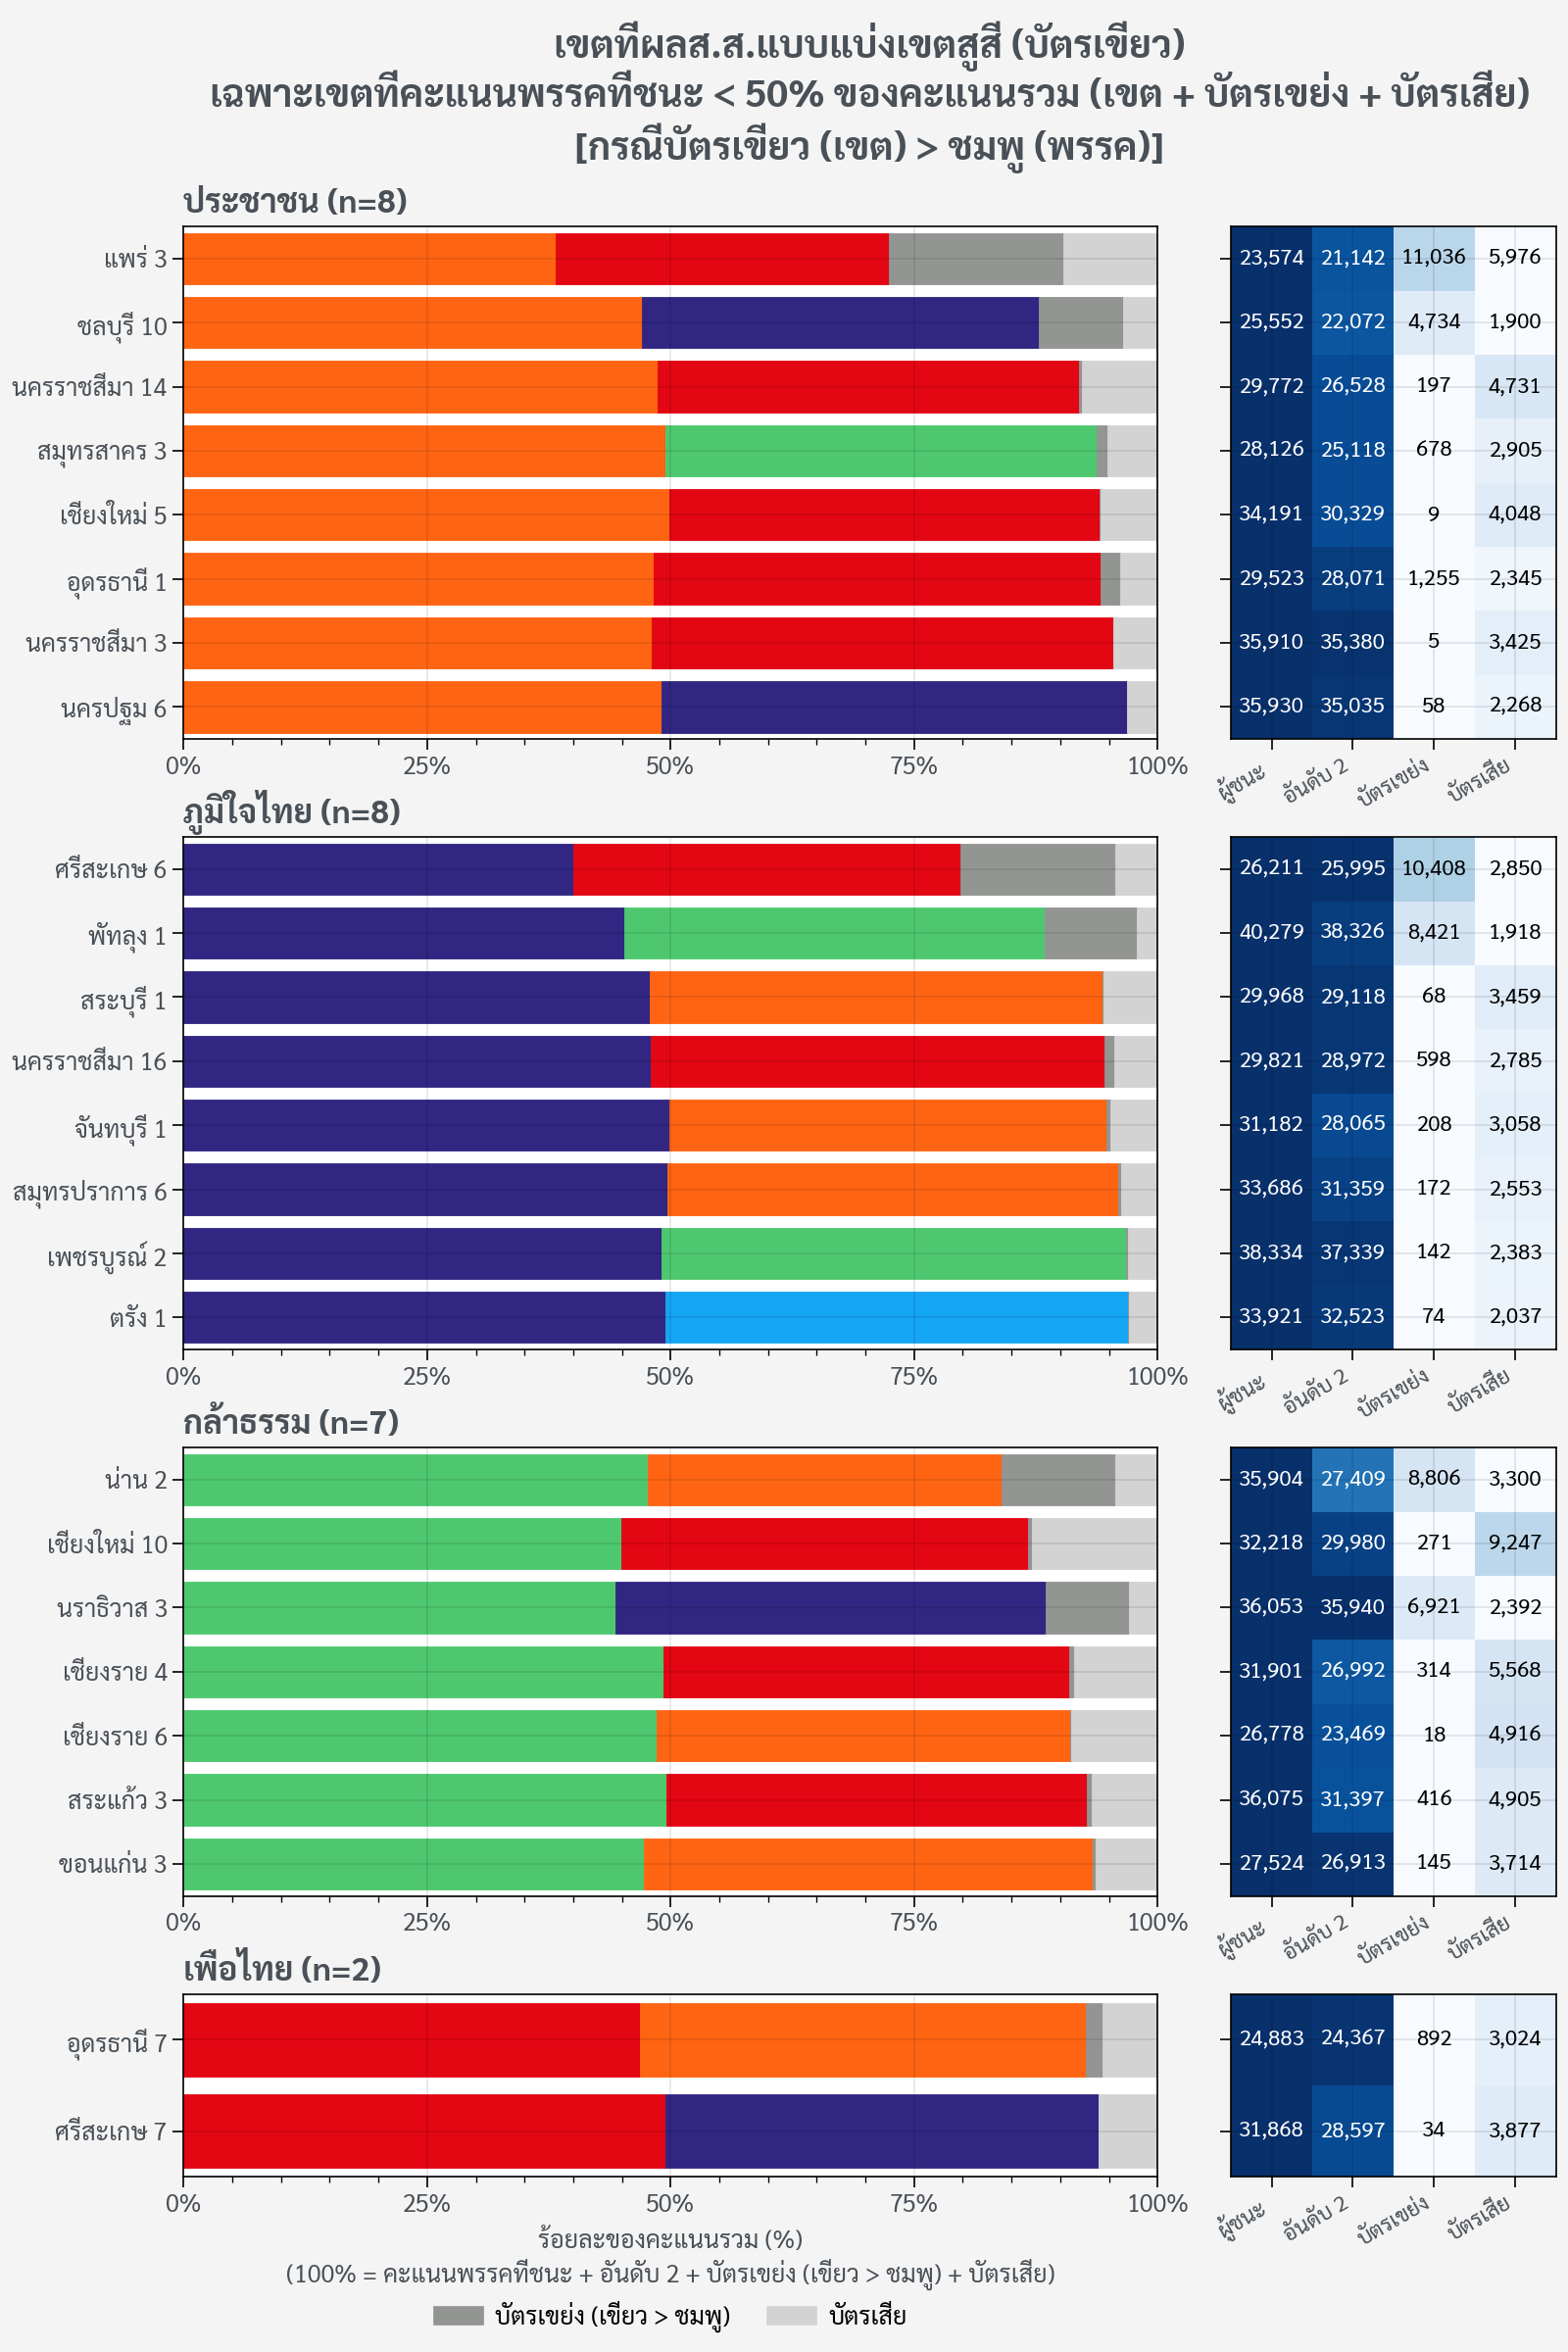

In [31]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np

mpl.rcParams['font.family'] = 'Sarabun'
mpl.rcParams['axes.unicode_minus'] = False

# --- Filter and build ---
idx_ballots = voters['voters_diff_const_PL'] > 0   # const has MORE ballots than PL

cols = ['const_winning_score', 'const_runnerUp_score',
        'const_invalid_ballots']
label_cols = ['const_winning_party', 'const_runnerUp_party', 'const_label']

plot_df = voters.loc[idx_ballots, cols + label_cols].copy()
plot_df['const_surplus'] = voters.loc[idx_ballots, 'voters_diff_const_PL'].abs()

num_cols = ['const_winning_score', 'const_runnerUp_score',
            'const_invalid_ballots', 'const_surplus']

# Percentage df
num = plot_df[num_cols]
plot_df_pct = num.div(num.sum(axis=1), axis=0) * 100

plot_df_pct['win_color']             = plot_df['const_winning_party'].map(party_color_dict)
plot_df_pct['ru_color']              = plot_df['const_runnerUp_party'].map(party_color_dict)
plot_df_pct['const_winning_party']   = plot_df['const_winning_party']
plot_df_pct['const_runnerUp_party']  = plot_df['const_runnerUp_party']
plot_df_pct['const_label']           = plot_df['const_label']
plot_df_pct['sort_key']              = (plot_df_pct['const_invalid_ballots']
                                        + plot_df_pct['const_surplus'])

# Raw counts df (keep aligned)
plot_df_raw = plot_df[num_cols].copy()

# Filter competitive: winner < 50%
idx_competitive = (
    plot_df_pct['const_runnerUp_score']
    + plot_df_pct['const_invalid_ballots']
    + plot_df_pct['const_surplus']
) >= 50

plot_df_pct = plot_df_pct[idx_competitive]
plot_df_raw = plot_df_raw[idx_competitive]
print(f"Retained {idx_competitive.sum()} / {len(idx_competitive)} constituencies")

# --- Subplot grid ---
party_stats = (plot_df_pct
               .groupby('const_winning_party')['const_winning_score']
               .count()
               .sort_values(ascending=False))

parties   = party_stats.index.values
n_bars    = party_stats.values
n_parties = len(parties)

bar_height = 0.35
min_height = 1.0
hratios    = np.array([max(n * bar_height, min_height) for n in n_bars])
hratios    = hratios / hratios.sum()
fig_height = sum(max(n * bar_height, min_height) for n in n_bars)

fig, axs = plot.subplots(nrows=n_parties, ncols=2,
                          figsize=(8, 12),
                          hratios=hratios,
                          wratios=(3, 1),
                          wspace=3, hspace=4,
                          share=0)

heat_cols   = ['const_winning_score', 'const_runnerUp_score',
               'const_surplus', 'const_invalid_ballots']
heat_labels = ['ผู้ชนะ', 'อันดับ 2', 'บัตรเขย่ง', 'บัตรเสีย']

# --- Plot each party ---
for i, party in enumerate(parties):
    ax_bar  = axs[i, 0]
    ax_heat = axs[i, 1]

    sub_pct = (plot_df_pct[plot_df_pct['const_winning_party'] == party]
               .sort_values('sort_key', ascending=True))
    sub_raw = plot_df_raw.loc[sub_pct.index, heat_cols]

    n = len(sub_pct)
    y = np.arange(n)

    # --- Left: barh ---
    ax_bar.barh(y, sub_pct['const_winning_score'],
                color=sub_pct['win_color'].values)
    ax_bar.barh(y, sub_pct['const_runnerUp_score'],
                left=sub_pct['const_winning_score'].values,
                color=sub_pct['ru_color'].values)
    left2 = (sub_pct['const_winning_score'] + sub_pct['const_runnerUp_score']).values
    ax_bar.barh(y, sub_pct['const_surplus'],
                left=left2, color='gray')
    ax_bar.barh(y, sub_pct['const_invalid_ballots'],
                left=left2 + sub_pct['const_surplus'].values,
                color='lightgray')

    ax_bar.set_yticks(y)
    ax_bar.set_yticklabels(sub_pct['const_label'].values, fontsize=9)
    ax_bar.set_xlim(0, 100)
    ax_bar.set_ylim(-0.5, n - 0.5)
    ax_bar.format(ltitle=f"{party} (n={n})", titlesize=12, titleweight='bold')

    # --- Right: heatmap ---
    heat_matrix = sub_raw.values.astype(float)
    row_min   = heat_matrix.min(axis=1, keepdims=True)
    row_max   = heat_matrix.max(axis=1, keepdims=True)
    row_range = np.where(row_max - row_min == 0, 1, row_max - row_min)
    heat_norm = (heat_matrix - row_min) / row_range

    ax_heat.imshow(heat_norm, aspect='auto', cmap='blues',
                   vmin=0, vmax=1, origin='lower',
                   extent=[-0.5, 3.5, -0.5, n - 0.5])

    for row_idx in range(heat_matrix.shape[0]):
        for col_idx in range(heat_matrix.shape[1]):
            val = heat_matrix[row_idx, col_idx]
            ax_heat.text(col_idx, row_idx, f'{val:,.0f}',
                         ha='center', va='center', fontsize=8,
                         color='black' if heat_norm[row_idx, col_idx] < 0.7 else 'white')

    ax_heat.set_xticks(range(4))
    ax_heat.set_xticklabels(heat_labels, fontsize=8, rotation=30, ha='right')
    ax_heat.set_yticks(y)
    ax_heat.set_yticklabels([])
    ax_heat.set_ylim(-0.5, n - 0.5)

# --- Shared formatting ---
axs[:, 0].format(
    ytickminor=False,
    xticks=[0, 25, 50, 75, 100],
    xticklabels=['0%', '25%', '50%', '75%', '100%'],
)
axs[:-1, 0].format(xlabel='')
axs[-1,  0].format(
    xlabel='ร้อยละของคะแนนรวม (%)\n'
           '(100% = คะแนนพรรคที่ชนะ + อันดับ 2 + บัตรเขย่ง (เขียว > ชมพู) + บัตรเสีย)'
)
axs[:, 1].format(xtickminor=False, ytickminor=False)

axs.format(
    suptitle='เขตที่ผลส.ส.แบบแบ่งเขตสูสี (บัตรเขียว)\nเฉพาะเขตที่คะแนนพรรคที่ชนะ < 50% ของคะแนนรวม (เขต + บัตรเขย่ง + บัตรเสีย)\n[กรณีบัตรเขียว (เขต) > ชมพู (พรรค)]',
    suptitlesize=14, suptitleweight='bold',
    labelcolor='gray7', titlecolor='gray7', suptitlecolor='gray7',
    xticklabelcolor='gray7', yticklabelcolor='gray7',
)

# --- Legend ---
handles = [
    mpatches.Patch(color='gray',      label='บัตรเขย่ง (เขียว > ชมพู)'),
    mpatches.Patch(color='lightgray', label='บัตรเสีย'),
]
axs[-1, 0].legend(handles=handles, loc='bottom', ncols=2, frameon=False)
fig.savefig('const_ballots_by_party.png', dpi=150, bbox_inches='tight')

Retained 49 / 190 constituencies


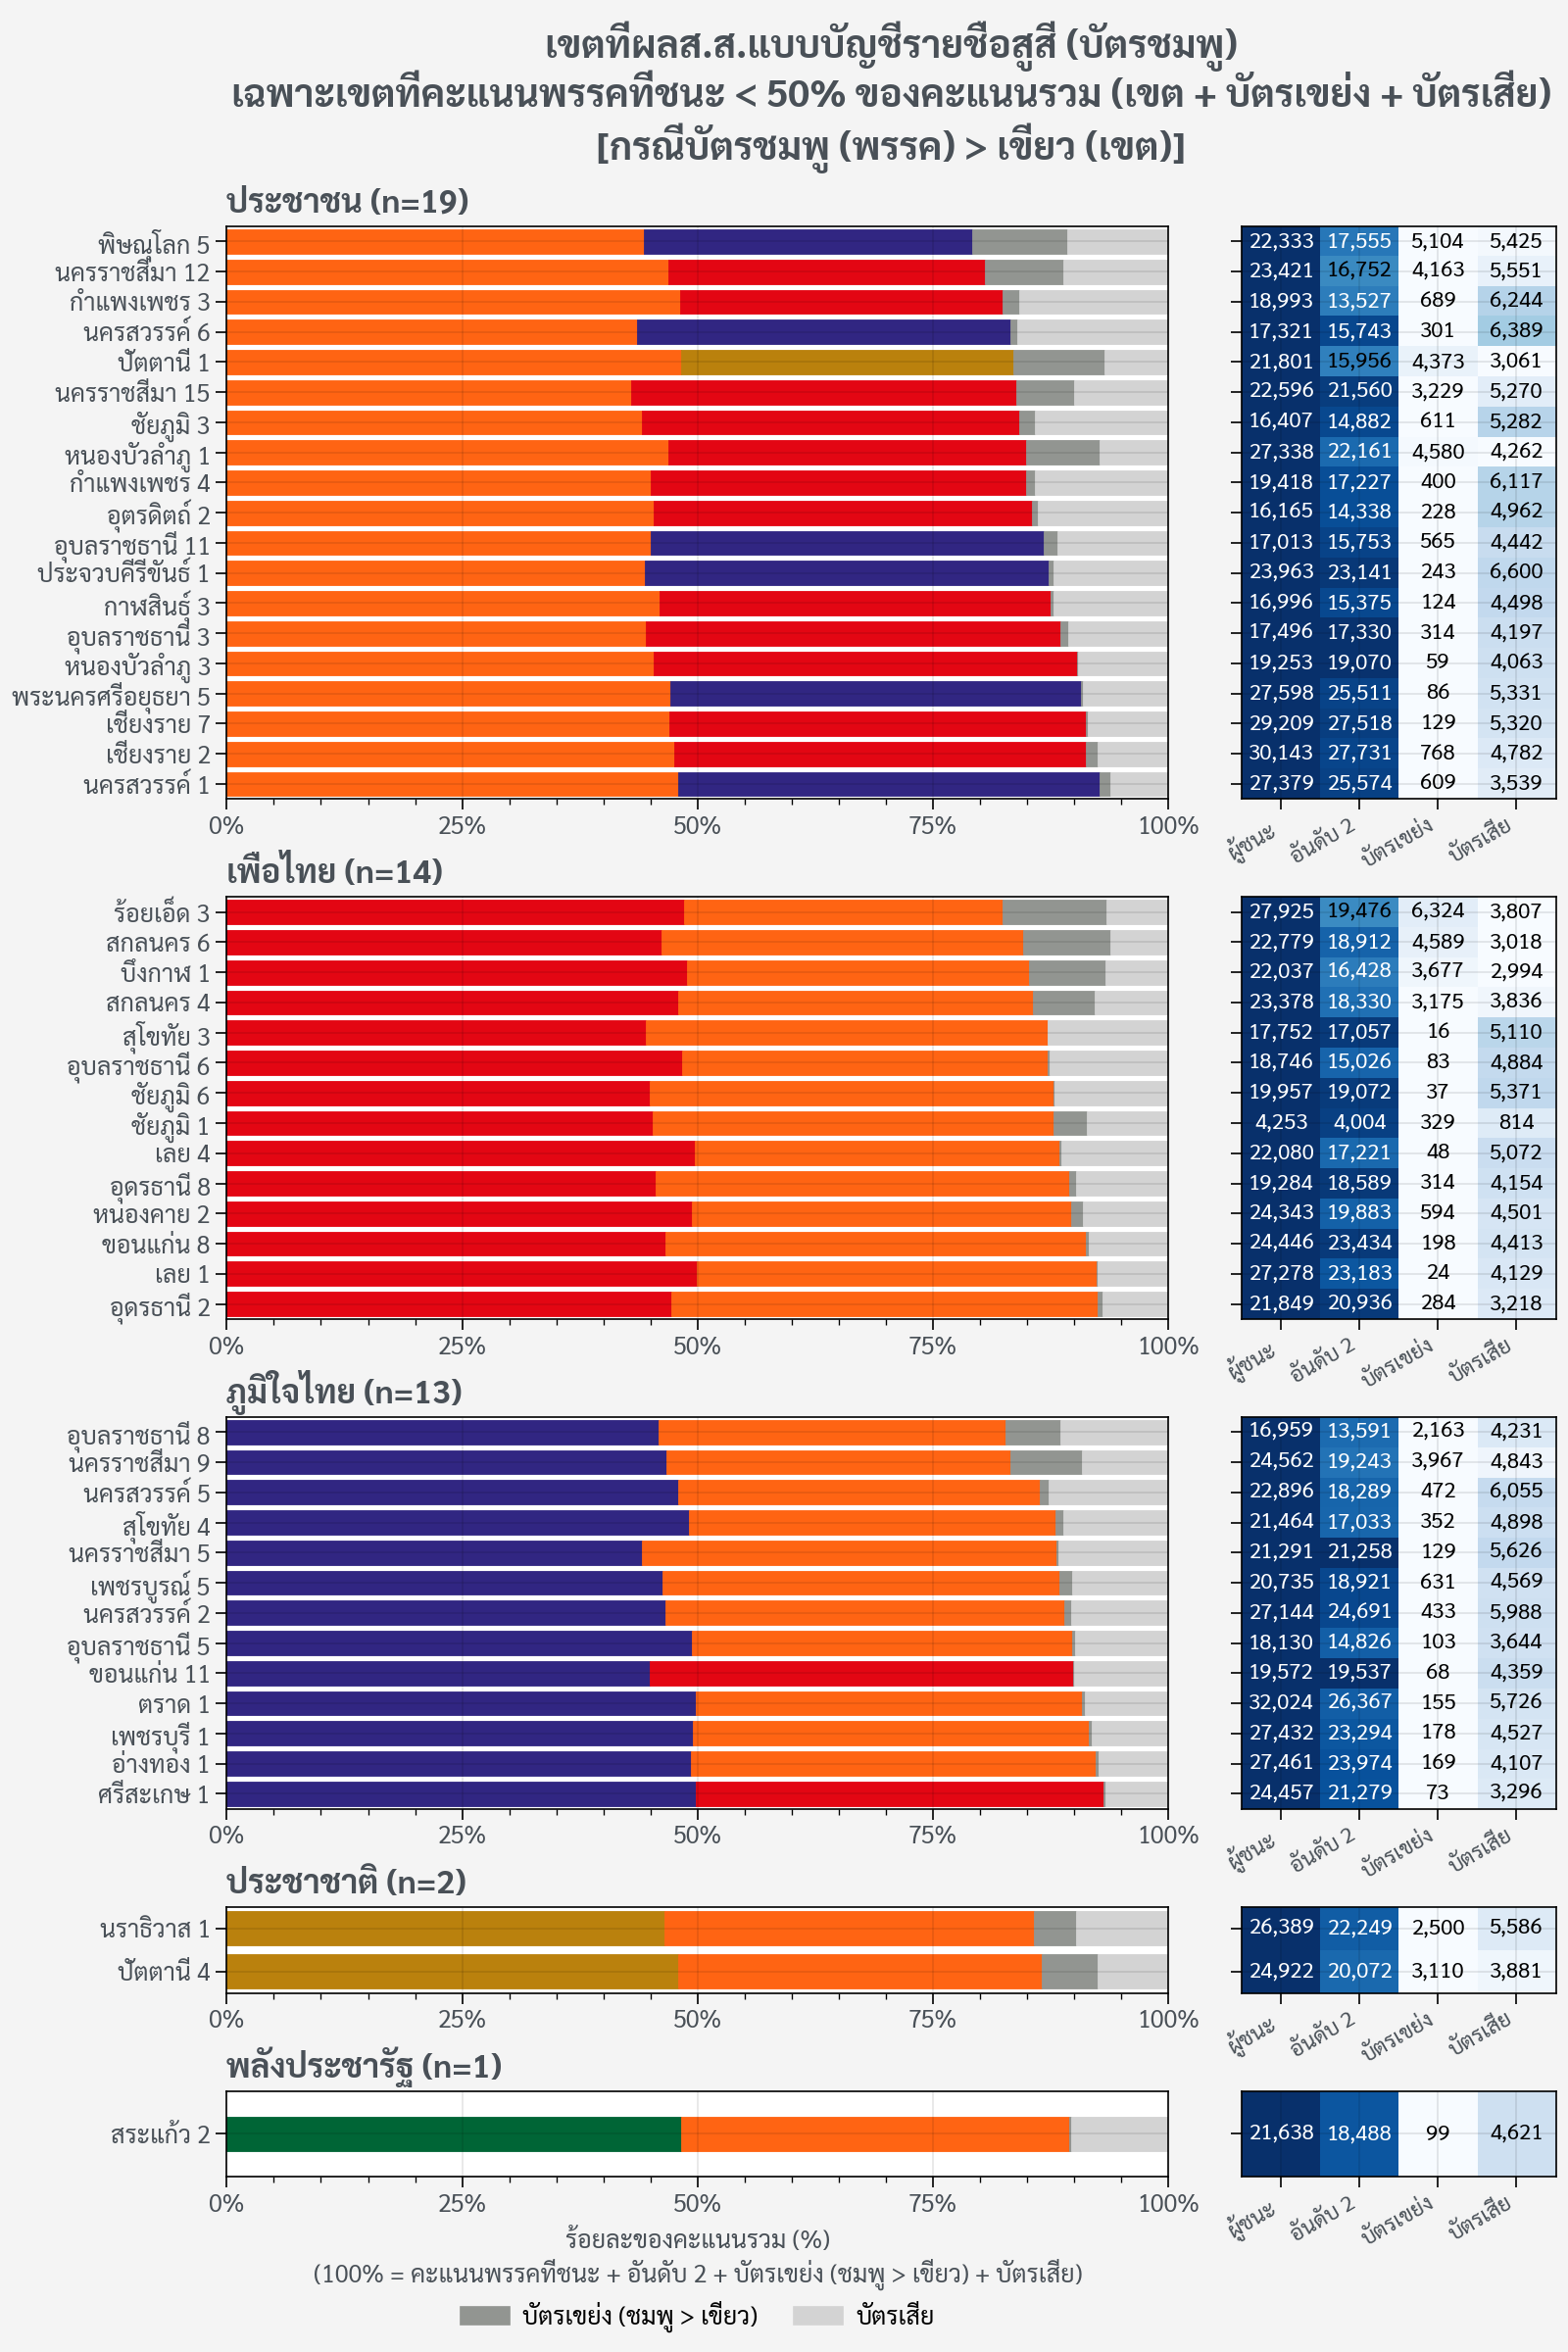

In [32]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np

mpl.rcParams['font.family'] = 'Sarabun'
mpl.rcParams['axes.unicode_minus'] = False

# --- Filter and build ---
idx_ballots = voters['voters_diff_const_PL'] < 0

cols = ['party_winning_score', 'party_runnerUp_score',
        'party_invalid_ballots']
label_cols = ['party_winning_party', 'party_runnerUp_party', 'const_label']

plot_df = voters.loc[idx_ballots, cols + label_cols].copy()
plot_df['PL_surplus'] = voters.loc[idx_ballots, 'voters_diff_const_PL'].abs()

num_cols = ['party_winning_score', 'party_runnerUp_score',
            'party_invalid_ballots', 'PL_surplus']

# Percentage df
num = plot_df[num_cols]
plot_df_pct = num.div(num.sum(axis=1), axis=0) * 100

plot_df_pct['win_color']            = plot_df['party_winning_party'].map(party_color_dict)
plot_df_pct['ru_color']             = plot_df['party_runnerUp_party'].map(party_color_dict)
plot_df_pct['party_winning_party']  = plot_df['party_winning_party']
plot_df_pct['party_runnerUp_party'] = plot_df['party_runnerUp_party']
plot_df_pct['const_label']          = plot_df['const_label']
plot_df_pct['sort_key']             = (plot_df_pct['party_invalid_ballots']
                                       + plot_df_pct['PL_surplus'])

# Raw counts df (keep aligned)
plot_df_raw = plot_df[num_cols].copy()

# Filter competitive
idx_competitive = (
    plot_df_pct['party_runnerUp_score']
    + plot_df_pct['party_invalid_ballots']
    + plot_df_pct['PL_surplus']
) >= 50

plot_df_pct = plot_df_pct[idx_competitive]
plot_df_raw = plot_df_raw[idx_competitive]
print(f"Retained {idx_competitive.sum()} / {len(idx_competitive)} constituencies")

# --- Subplot grid ---
party_stats = (plot_df_pct
               .groupby('party_winning_party')['party_winning_score']
               .count()
               .sort_values(ascending=False))

parties   = party_stats.index.values
n_bars    = party_stats.values
n_parties = len(parties)

bar_height = 0.35
min_height = 1.0
hratios    = np.array([max(n * bar_height, min_height) for n in n_bars])
hratios    = hratios / hratios.sum()
fig_height = sum(max(n * bar_height, min_height) for n in n_bars)

# ncols=2: left=barh, right=heatmap
# wratios: give barh more space than heatmap
fig, axs = plot.subplots(nrows=n_parties, ncols=2,
                          figsize=(8,12),
                          hratios=hratios,
                          wratios=(3, 1),
                          wspace=3,hspace=4,
                          share=0)

heat_cols   = ['party_winning_score', 'party_runnerUp_score',
               'PL_surplus', 'party_invalid_ballots']
heat_labels = ['ผู้ชนะ', 'อันดับ 2', 'บัตรเขย่ง', 'บัตรเสีย']

# --- Plot each party ---
for i, party in enumerate(parties):
    ax_bar  = axs[i, 0]
    ax_heat = axs[i, 1]

    sub_pct = (plot_df_pct[plot_df_pct['party_winning_party'] == party]
               .sort_values('sort_key', ascending=True))
    sub_raw = plot_df_raw.loc[sub_pct.index, heat_cols]

    n = len(sub_pct)
    y = np.arange(n)

    # --- Left: barh ---
    ax_bar.barh(y, sub_pct['party_winning_score'],
                color=sub_pct['win_color'].values)
    ax_bar.barh(y, sub_pct['party_runnerUp_score'],
                left=sub_pct['party_winning_score'].values,
                color=sub_pct['ru_color'].values)
    left2 = (sub_pct['party_winning_score'] + sub_pct['party_runnerUp_score']).values
    ax_bar.barh(y, sub_pct['PL_surplus'],
                left=left2, color='gray')
    ax_bar.barh(y, sub_pct['party_invalid_ballots'],
                left=left2 + sub_pct['PL_surplus'].values,
                color='lightgray')

    ax_bar.set_yticks(y)
    ax_bar.set_yticklabels(sub_pct['const_label'].values, fontsize=9)
    ax_bar.set_xlim(0, 100)
    ax_bar.set_ylim(-0.5, n - 0.5)   # ← lock ylim
    ax_bar.format(ltitle=f"{party} (n={n})", titlesize=12, titleweight='bold')

    # --- Right: heatmap ---
    heat_matrix = sub_raw.values.astype(float)
    row_min   = heat_matrix.min(axis=1, keepdims=True)
    row_max   = heat_matrix.max(axis=1, keepdims=True)
    row_range = np.where(row_max - row_min == 0, 1, row_max - row_min)
    heat_norm = (heat_matrix - row_min) / row_range

    ax_heat.imshow(heat_norm, aspect='auto', cmap='blues',
                   vmin=0, vmax=1, origin='lower',
                   extent=[-0.5, 3.5, -0.5, n - 0.5])  # ← explicit extent

    for row_idx in range(heat_matrix.shape[0]):
        for col_idx in range(heat_matrix.shape[1]):
            val = heat_matrix[row_idx, col_idx]
            ax_heat.text(col_idx, row_idx, f'{val:,.0f}',
                         ha='center', va='center', fontsize=8,
                         color='black' if heat_norm[row_idx, col_idx] < 0.7 else 'white')

    ax_heat.set_xticks(range(4))
    ax_heat.set_xticklabels(heat_labels, fontsize=8, rotation=30, ha='right')
    ax_heat.set_yticks(y)
    ax_heat.set_yticklabels([])
    ax_heat.set_ylim(-0.5, n - 0.5)   # ← lock ylim to match barh

# --- Shared formatting ---
axs[:, 0].format(
    ytickminor=False,
    xticks=[0, 25, 50, 75, 100],
    xticklabels=['0%', '25%', '50%', '75%', '100%'],
)
axs[:-1, 0].format(xlabel='')
axs[-1,  0].format(
    xlabel='ร้อยละของคะแนนรวม (%)\n'
           '(100% = คะแนนพรรคที่ชนะ + อันดับ 2 + บัตรเขย่ง (ชมพู > เขียว) + บัตรเสีย)'
)
axs[:,1].format(xtickminor=False,ytickminor=False)

axs.format(
    suptitle='เขตที่ผลส.ส.แบบบัญชีรายชื่อสูสี (บัตรชมพู)\nเฉพาะเขตที่คะแนนพรรคที่ชนะ < 50% ของคะแนนรวม (เขต + บัตรเขย่ง + บัตรเสีย)\n[กรณีบัตรชมพู (พรรค) > เขียว (เขต)]',
    suptitlesize=14, suptitleweight='bold',
    labelcolor='gray7',titlecolor='gray7',suptitlecolor='gray7',
    xticklabelcolor='gray7', yticklabelcolor='gray7',
)

# --- Legend ---
handles = [
    mpatches.Patch(color='gray',      label='บัตรเขย่ง (ชมพู > เขียว)'),
    mpatches.Patch(color='lightgray', label='บัตรเสีย'),
]
axs[-1,0].legend(handles=handles, loc='bottom', ncols=2, frameon=False)
fig.savefig('PL_ballots_by_party.png', dpi=150, bbox_inches='tight')

In [34]:
# # EXPORT FOR VISUALIZATION
# import json
# import os
# from datetime import datetime
# from pathlib import Path

# def export_to_javascript_94pct(const_df, party_df):
#     output_js = 'election_data_94pct.js'
    
#     # 1. Process Constituency Data
#     const_raw = []
#     for _, r in const_df.iterrows():
#         total_voters = r.get('const_voters', 0)
#         invalid = r.get('const_invalid_ballots', 0)
#         pct_invalid = (invalid / total_voters * 100) if total_voters > 0 else 0
        
#         const_raw.append({
#             "province_thai": str(r.get('province', 'Unknown')),
#             "cons_no": int(r.get('constituency_number', 0)),
#             "region": str(r.get('region', 'Unknown')),
#             "invalid_2569": int(invalid),
#             "percent_invalid_2569": float(pct_invalid),
#             "winner_party_2569": str(r.get('const_winning_party', 'Unknown')),
#             "winner_votes_2569": int(r.get('const_winning_score', 0)),
#             "runnerup_party_2569": str(r.get('const_runnerUp_party', 'Unknown')),
#             "runnerup_votes_2569": int(r.get('const_runnerUp_score', 0)),
#             "margin_2569": int(r.get('const_winning_score_diff', 0))
#         })

#     # 2. Process Party List Data
#     pl_raw = []
#     for _, r in party_df.iterrows():
#         total_voters = r.get('party_voters', 0)
#         invalid = r.get('party_invalid_ballots', 0)
#         pct_invalid = (invalid / total_voters * 100) if total_voters > 0 else 0
        
#         pl_raw.append({
#             "province_thai": str(r.get('province', 'Unknown')),
#             "cons_no": int(r.get('constituency_number', 0)),
#             "region": str(r.get('region', 'Unknown')),
#             "invalid_2569": int(invalid),
#             "percent_invalid_2569": float(pct_invalid),
#             "winner_party_2569": str(r.get('party_winning_party', 'Unknown')),
#             "winner_votes_2569": int(r.get('party_winning_score', 0)),
#             "runnerup_party_2569": str(r.get('party_runnerUp_party', 'Unknown')),
#             "runnerup_votes_2569": int(r.get('party_runnerUp_score', 0)),
#             "margin_2569": int(r.get('party_winning_score_diff', 0))
#         })

#     timestamp_str = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     const_json = json.dumps(const_raw, ensure_ascii=False, indent=2)
#     pl_json = json.dumps(pl_raw, ensure_ascii=False, indent=2)

#     js_content = f"""// Unofficial 94% Election Data for Thailand 2569
# // Generated: {timestamp_str}

# var CONST_RAW = {const_json};
# var PARTYLIST_RAW = {pl_json};
# """
#     with open(output_js, 'w', encoding='utf-8') as f:
#         f.write(js_content)
#     print(f"✓ Exported {output_js}")

#     # ARCHIVING
#     archives_dir = Path('archives')
#     archives_dir.mkdir(exist_ok=True)
    
#     timestamp_file = datetime.now().strftime("%Y%m%d_%H%M%S")
#     archive_filename = f"election_data_94pct_{timestamp_file}.js"
#     archive_path = archives_dir / archive_filename
    
#     with open(archive_path, 'w', encoding='utf-8') as f:
#         f.write(js_content)
#     print(f"✓ Archived to {archive_path}")

#     # UPDATE MANIFEST
#     manifest_file = archives_dir / 'manifest.json'
#     if manifest_file.exists():
#         with open(manifest_file, 'r', encoding='utf-8') as f:
#             manifest = json.load(f)
#     else:
#         manifest = []
    
#     archive_id = f"94pct_{timestamp_file}"
#     manifest.append({
#         "id": archive_id,
#         "name": f"Unofficial 94%: {timestamp_str}",
#         "file": f"archives/{archive_filename}"
#     })
    
#     with open(manifest_file, 'w', encoding='utf-8') as f:
#         json.dump(manifest, f, indent=2, ensure_ascii=False)
#     print("✓ Manifest updated.")

# # Execution call
# # Assumes 'voters' dataframe is available from the previous cells
# if 'voters' in globals():
#     export_to_javascript_94pct(voters, voters) # Both currently derived from 'voters' in this notebook
# else:
#     print("Error: 'voters' dataframe not found. Please run previous cells first.")


In [36]:

excel_path = '/home/ronnie-rattan/Documents/GitHub/th-election69-visualization/data/election69/ElectionData-Analysis-Public-Transfer-unofficial94percent.xlsx'

# 1. CONSTITUENCY DATA
df_const_full = pd.read_excel(excel_path, sheet_name='สสแบ่งเขต')

# Group by province and constituency to get summaries
# Assume ลำดับคะแนน 1 is the winner
const_raw = []
for (prov, cons), group in df_const_full.groupby(['จังหวัด', 'เขตเลือกตั้งที่']):
    winner_row = group[group['ลำดับคะแนน'] == 1].iloc[0] if not group[group['ลำดับคะแนน'] == 1].empty else None
    runnerup_row = group[group['ลำดับคะแนน'] == 2].iloc[0] if len(group) > 1 else None
    
    if winner_row is not None:
        voters = int(winner_row.get('ผู้มาใช้สิทธิ์', 0))
        valid = int(winner_row.get('บัตรดี', 0))
        invalid = int(winner_row.get('บัตรเสีย', 0))
        blank = int(winner_row.get('บัตรไม่เลือกผู้ใด', 0))
        margin = int(winner_row.get('คะแนนเสียง', 0)) - int(runnerup_row.get('คะแนนเสียง', 0)) if runnerup_row is not None else 0
        
        const_raw.append({
            "province_thai": str(prov),
            "cons_no": int(cons),
            "turn_out_2569": voters,
            "total_used_2569": voters,
            "valid_2569": valid,
            "invalid_2569": invalid,
            "blank_2569": blank,
            "percent_invalid_2569": (float(invalid) / float(voters) * 100) if voters > 0 else 0,
            "winner_party_2569": str(winner_row.get('พรรคที่สังกัด', 'Unknown')),
            "winner_votes_2569": int(winner_row.get('คะแนนเสียง', 0)),
            "runnerup_party_2569": str(runnerup_row.get('พรรคที่สังกัด', 'Unknown')) if runnerup_row is not None else "Unknown",
            "runnerup_votes_2569": int(runnerup_row.get('คะแนนเสียง', 0)) if runnerup_row is not None else 0,
            "margin_2569": int(margin)
        })


        


In [38]:
df_pl_full = pd.read_excel(excel_path, sheet_name='party list')
pl_raw = []
for (prov, cons), group in df_pl_full.groupby(['จังหวัด', 'เขตเลือกตั้งที่']):
    # Logic similar to constituency
    winner_row = group[group['ลำดับคะแนน'] == 1].iloc[0] if not group[group['ลำดับคะแนน'] == 1].empty else None
    runnerup_row = group[group['ลำดับคะแนน'] == 2].iloc[0] if len(group) > 1 else None
    
    if winner_row is not None:
        voters = int(winner_row.get('ผู้มาใช้สิทธิ์', 0))
        valid = int(winner_row.get('บัตรดี', 0))
        invalid = int(winner_row.get('บัตรเสีย', 0))
        blank = int(winner_row.get('บัตรไม่เลือกผู้ใด', 0))
        margin = int(winner_row.get('คะแนนเสียง', 0)) - int(runnerup_row.get('คะแนนเสียง', 0)) if runnerup_row is not None else 0
        
        pl_raw.append({
            "province_thai": str(prov),
            "cons_no": int(cons),
            "turn_out_2569": voters,
            "total_used_2569": voters,
            "valid_2569": valid,
            "invalid_2569": invalid,
            "blank_2569": blank,
            "percent_invalid_2569": (float(invalid) / float(voters) * 100) if voters > 0 else 0,
            "winner_party_2569": str(winner_row.get('พรรคการเมือง', 'Unknown')),
            "winner_votes_2569": int(winner_row.get('คะแนนเสียง', 0)),
            "runnerup_party_2569": str(runnerup_row.get('พรรคการเมือง', 'Unknown')) if runnerup_row is not None else "Unknown",
            "runnerup_votes_2569": int(runnerup_row.get('คะแนนเสียง', 0)) if runnerup_row is not None else 0,
            "margin_2569": int(margin)
        })

In [39]:
pl_raw

[{'province_thai': 'กระบี่',
  'cons_no': 1,
  'turn_out_2569': 92607,
  'total_used_2569': 92607,
  'valid_2569': 86827,
  'invalid_2569': 3254,
  'blank_2569': 2526,
  'percent_invalid_2569': 3.513773256881229,
  'winner_party_2569': 'ประชาธิปัตย์',
  'winner_votes_2569': 32568,
  'runnerup_party_2569': 'ประชาชน',
  'runnerup_votes_2569': 21428,
  'margin_2569': 11140},
 {'province_thai': 'กระบี่',
  'cons_no': 2,
  'turn_out_2569': 78612,
  'total_used_2569': 78612,
  'valid_2569': 74067,
  'invalid_2569': 2804,
  'blank_2569': 1741,
  'percent_invalid_2569': 3.5668854627792195,
  'winner_party_2569': 'ประชาธิปัตย์',
  'winner_votes_2569': 44106,
  'runnerup_party_2569': 'ประชาชน',
  'runnerup_votes_2569': 10752,
  'margin_2569': 33354},
 {'province_thai': 'กระบี่',
  'cons_no': 3,
  'turn_out_2569': 85728,
  'total_used_2569': 85728,
  'valid_2569': 80838,
  'invalid_2569': 3064,
  'blank_2569': 1826,
  'percent_invalid_2569': 3.574094811496827,
  'winner_party_2569': 'ประชาธิปัตย์